Matplotlib과 Seaborn을 이용하여 

종업원들이 팁을 얼마 받았는지에 대한 데이터를 EDA하고 시각화해보자.

1. 범주형 데이터
    * Pandas를 이용한 막대그래프
    * Seaborn을 이용한 막대그래프
    
    
2. 수치형 데이터
    * 산점도
    * 히스토그램
    * 선 그래프
    
출처: https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

In [3]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [7]:
df = pd.DataFrame(tips)
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.shape

(244, 7)

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


결측 값이 없어서 결측 값 처리가 따로 필요하지 않는다.

데이터 변수들 중에서 sex, smoker, day, time이 범주형 데이터

tips, total_bill, size는 수치형 데이터

그러나 size는 테이블 인원을 의미하니까 범주형 데이터로 분류

In [10]:
# 범주형 변수들의 카테고리별 개수
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


# 범주형 데이터

### Pandas를 이용

In [12]:
grouped = df['tip'].groupby(df['sex'])

In [14]:
print(grouped.mean()) # 성별에 따른 팁의 평균
print(grouped.size()) # 성별에 따른 팁 횟수

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64
sex
Male      157
Female     87
Name: tip, dtype: int64


In [15]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꾸기
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [16]:
x = list(sex.keys())  
y = list(sex.values())

Text(0.5, 1.0, 'Tip by Sex')

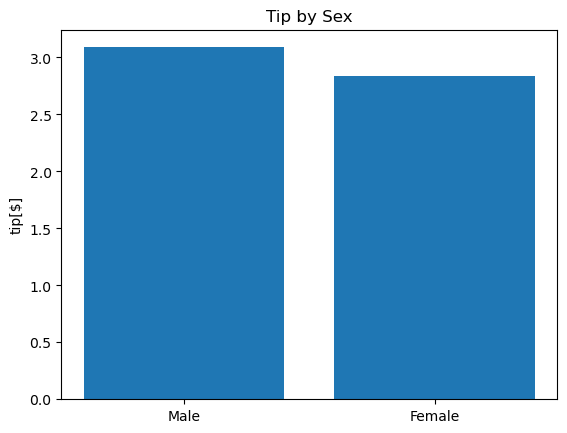

In [18]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

### Seaborn을 이용

Text(0.5, 1.0, 'Tip by sex')

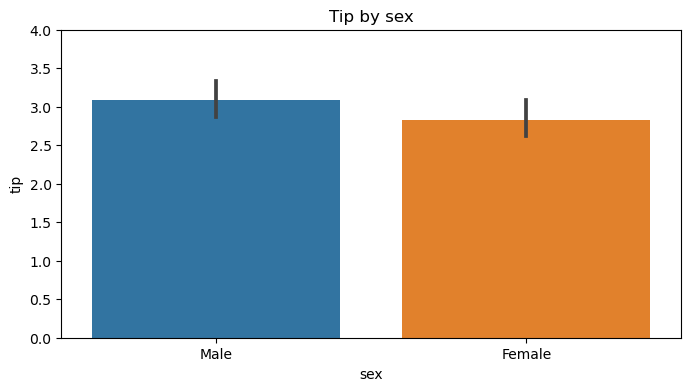

In [23]:
plt.figure(figsize=(8,4)) # 사이즈
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위
plt.title('Tip by sex') # 그래프 제목

Text(0.5, 1.0, 'Tip by day')

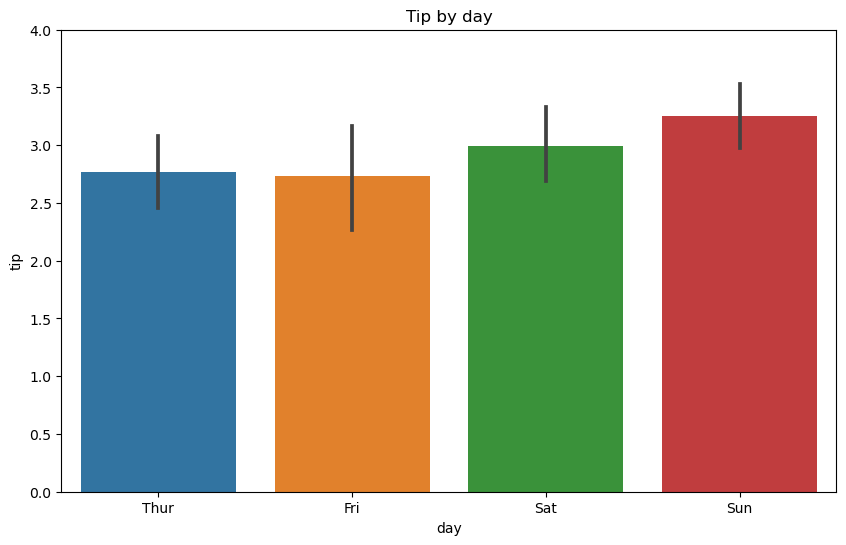

In [24]:
# 요일에 따른 팁
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

# 수치형 데이터

### 산점도

전체 음식 가격에 따른 팁 데이터 시각화

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

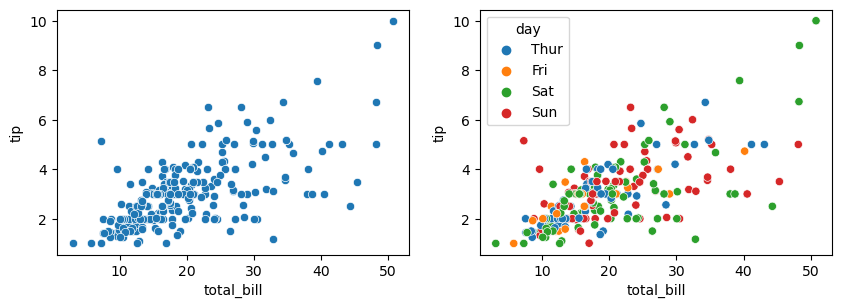

In [29]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")
ax2 = fig.add_subplot(2,2,2)
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

### 히스토그램

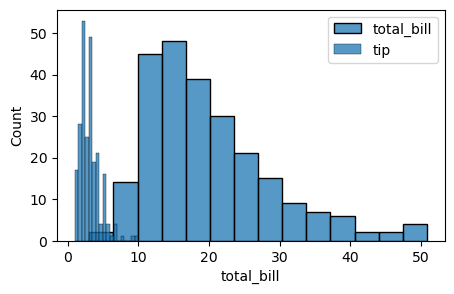

In [40]:
plt.figure(figsize=(5,3))
sns.histplot(df['total_bill'], label = "total_bill")
sns.histplot(df['tip'], label = "tip").legend() # legend를 이용하여 label을 표시

<AxesSubplot:>

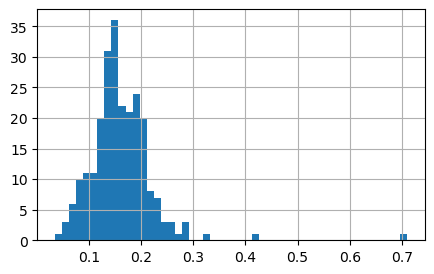

In [41]:
# 전체 결제 금액 대비 팁의 비율
plt.figure(figsize=(5,3))
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

### 선 그래프

팁 데이터로는 선 그래프로 표현이 어렵기 때문에, numpy를 이용하여 데이터를 생성 후 선 그래프

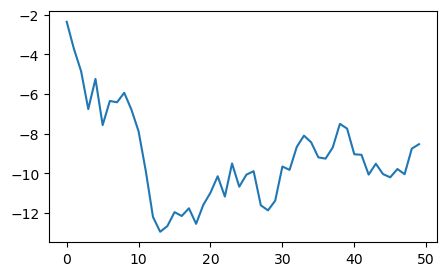

In [39]:
plt.figure(figsize=(5,3))
plt.plot(np.random.randn(50).cumsum())